In [1]:
from pymongo import MongoClient
import pprint

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import json
import time
import requests

In [6]:
r = requests.get('https://pokemondb.net/pokedex/all')
r.text[:1000]

'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<title>Pokémon Pokédex: list of Pokémon with stats | Pokémon Database</title>\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link rel="preconnect" href="https://img.pokemondb.net">\n<link rel="stylesheet" href="/static/css/pokemondb-e444f21899.css">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<meta property="og:description" name="description" content="The Pokédex contains detailed stats for every creature from the Pokémon games, up to and including the latest Sword/Shield games.">\n<link rel="canonical" href="https://pokemondb.net/pokedex/all">\n<meta property="og:url" content="https://pokemondb.net/pokedex/all">\n<meta name="twitter:card" content="summary">\n<meta property="og:title" content="Pokémon Pokédex: list of Pokémon with stats">\n<link rel="shortcut icon" type="image/x-icon" href="/favicon.ico">\n<link rel="apple-touch-icon-precomposed" href="/apple-touch-icon-precompos

In [8]:
r.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<title>Pok\xc3\xa9mon Pok\xc3\xa9dex: list of Pok\xc3\xa9mon with stats | Pok\xc3\xa9mon Database</title>\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link rel="preconnect" href="https://img.pokemondb.net">\n<link rel="stylesheet" href="/static/css/pokemondb-e444f21899.css">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<meta property="og:description" name="description" content="The Pok\xc3\xa9dex contains detailed stats for every creature from the Pok\xc3\xa9mon games, up to and including the latest Sword/Shield games.">\n<link rel="canonical" href="https://pokemondb.net/pokedex/all">\n<meta property="og:url" content="https://pokemondb.net/pokedex/all">\n<meta name="twitter:card" content="summary">\n<meta property="og:title" content="Pok\xc3\xa9mon Pok\xc3\xa9dex: list of Pok\xc3\xa9mon with stats">\n<link rel="shortcut icon" type="image/x-icon" href="/favicon.ico">\n<link rel=

# Mongo

In [7]:
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Pokémon Pokédex: list of Pokémon with stats | Pokémon Database
  </title>
  <link href="https://fonts.gstatic.com" rel="preconnect"/>
  <link href="https://img.pokemondb.net" rel="preconnect"/>
  <link href="/static/css/pokemondb-e444f21899.css" rel="stylesheet"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="The Pokédex contains detailed stats for every creature from the Pokémon games, up to and including the latest Sword/Shield games." name="description" property="og:description"/>
  <link href="https://pokemondb.net/pokedex/all" rel="canonical"/>
  <meta content="https://pokemondb.net/pokedex/all" property="og:url"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="Pokémon Pokédex: list of Pokémon with stats" property="og:title"/>
  <link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/apple-touch-icon-precomposed.png

In [84]:
tags = soup.find_all('tr')
tags

[<tr>
 <th class="sorting" data-sort="int"><div class="sortwrap">#</div></th> <th class="sorting" data-sort="string"><div class="sortwrap">Name</div></th> <th><div class="sortwrap">Type</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Total</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">HP</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Attack</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Defense</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Atk</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Sp. Def</div></th> <th class="sorting" data-sort="int"><div class="sortwrap">Speed</div></th> </tr>,
 <tr>
 <td class="cell-num cell-fixed" data-sort-value="1"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Bulbasaur icon" data-src="https://img.pokemondb.net/sprites/sword-shield/icon/bulbasaur.png"></span></span><span class="infocard-cel

In [18]:

for link in soup.find_all('a'):
    names.append(link.text)

In [312]:
len(names)

1045

In [8]:
headers = []
for link in soup.find_all('a',class_ = "th.sorting"):
    headers.append(link.text)

In [9]:
headers = soup.find('th',class_ = 'sorting').text

In [10]:
tags= soup.find_all('a','class')


In [11]:
header = soup.find_all("th",{"class":"sorting"})
len(header)

9

In [12]:
# Loop for header 
cols = []
for i in range(len(header)):
    cols.append(header[i].text)

In [13]:
cols

['#',
 'Name',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed']

In [59]:
base = soup.find_all("td",{"class":"cell-total"})
base_total = []
for i in range(len(base)):
    base_total.append(base[i].text)

In [60]:
len(base_total)

1045

In [61]:
table = soup.select("#pokedex > tbody")[0]
#table = table.find_all("tr")

In [62]:
table.find_all("td")

[<td class="cell-num cell-fixed" data-sort-value="1"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Bulbasaur icon" data-src="https://img.pokemondb.net/sprites/sword-shield/icon/bulbasaur.png"></span></span><span class="infocard-cell-data">001</span></td>,
 <td class="cell-name"><a class="ent-name" href="/pokedex/bulbasaur" title="View pokedex for #001 Bulbasaur">Bulbasaur</a></td>,
 <td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/> <a class="type-icon type-poison" href="/type/poison">Poison</a></td>,
 <td class="cell-total">318</td>,
 <td class="cell-num">45</td>,
 <td class="cell-num">49</td>,
 <td class="cell-num">49</td>,
 <td class="cell-num">65</td>,
 <td class="cell-num">65</td>,
 <td class="cell-num">45</td>,
 <td class="cell-num cell-fixed" data-sort-value="2"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Ivysaur icon" data-src="https://img.pokemondb.net/sprites/sword-shield/icon/i

In [63]:
types = soup.find_all('td',class_ = "cell-icon")
types[0]

<td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/> <a class="type-icon type-poison" href="/type/poison">Poison</a></td>

In [64]:
pokemon_types = []
for x in types:
    pokemon_types.append(x.text)

In [65]:
len(pokemon_types)

1045

In [66]:
names = soup.find_all("td",{"class":"cell-name"})
pokemon_names = []
for i in range(len(names)):
    pokemon_names.append(names[i].text)

In [67]:
len(pokemon_names)

1045

In [68]:
pokemon_names[0]

'Bulbasaur'

In [69]:
# Num Stats 
nums = soup.find_all('td',attrs ={'class':'cell-num'})
stats = []
for i in nums:
    stats.append(i.text)

In [70]:
len(stats)

7315

In [71]:
# National index  
pokemon_num = []
for i in range(0, len(stats), 7):
    pokemon_num.append(stats[i])

In [72]:
len(pokemon_num)

1045

In [73]:
# HP
pokemon_hp = []
for i in range(1, len(stats), 7):
    pokemon_hp.append(stats[i])

In [74]:
len(pokemon_hp)

1045

In [75]:
# Attack 
pokemon_att = []
for i in range(2, len(stats), 7):
    pokemon_att.append(stats[i])

In [76]:
len(pokemon_att)

1045

In [77]:
# defense
pokemon_def = []
for i in range(3, len(stats), 7):
    pokemon_def.append(stats[i])

In [78]:
len(pokemon_def)

1045

In [79]:
# Sp. Att 
pokemon_spatt = []
for i in range(4, len(stats), 7):
    pokemon_spatt.append(stats[i])

In [80]:
len(pokemon_spatt)

1045

In [81]:
# Sp. Def 
pokemon_spdef = []
for i in range(5, len(stats), 7):
    pokemon_spdef.append(stats[i])

In [82]:
len(pokemon_spdef)

1045

In [83]:
# Speed
pokemon_speed = []
for i in range(6, len(stats), 7):
    pokemon_speed.append(stats[i])

In [43]:
len(pokemon_speed)

1045

In [85]:
pokemon_total = [int(i) if i != '' else "NaN" for i in base_total]
pokemon_hp = [int(i) if i != '' else "NaN" for i in pokemon_hp]
pokemon_att = [int(i) if i != '' else "NaN" for i in pokemon_att]
pokemon_def = [int(i) if i != '' else "NaN" for i in pokemon_def]
pokemon_spatt = [int(i) if i != '' else "NaN" for i in pokemon_spatt]
pokemon_spdef = [int(i) if i != '' else "NaN" for i in pokemon_spdef]
pokemon_speed = [int(i) if i != '' else "NaN" for i in pokemon_speed]

In [86]:
pokemon_id = [int(i) if i != '' else "NaN" for i in pokemon_num]

In [94]:
pokemon_data = {
    "ID" : pokemon_id,
    "NAME": pokemon_names, 
    "TYPE": pokemon_types,
    "BASE STAT": pokemon_total, 
    "HP" : pokemon_hp,
    "ATTACK" : pokemon_att,
    "DEFENSE" : pokemon_def,
    "SP ATTACK": pokemon_spatt,
    "SP DEFENSE": pokemon_spdef,
    "SPEED": pokemon_speed
}

In [95]:
pdf = pd.DataFrame(pokemon_data)

In [96]:
pdf.head()

ID                    NAME          TYPE BASE STAT  HP ATTACK DEFENSE  \
0   1               Bulbasaur  Grass Poison       318  45     49      49   
1   2                 Ivysaur  Grass Poison       405  60     62      63   
2   3                Venusaur  Grass Poison       525  80     82      83   
3   3  Venusaur Mega Venusaur  Grass Poison       625  80    100     123   
4   4              Charmander         Fire        309  39     52      43   

  SP ATTACK SP DEFENSE SPEED  
0        65         65    45  
1        80         80    60  
2       100        100    80  
3       122        120    80  
4        60         50    65

In [93]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1045 non-null   int64 
 1   NAME        1045 non-null   object
 2   TYPE        1045 non-null   object
 3   HP          1045 non-null   object
 4   ATTACK      1045 non-null   object
 5   DEFENSE     1045 non-null   object
 6   SP ATTACK   1045 non-null   object
 7   SP DEFENSE  1045 non-null   object
 8   SPEED       1045 non-null   object
dtypes: int64(1), object(8)
memory usage: 73.6+ KB


In [98]:
pdf.groupby("TYPE").count()

ID  NAME  BASE STAT  HP  ATTACK  DEFENSE  SP ATTACK  \
TYPE                                                                 
Bug            19    19         19  19      19       19         19   
Bug Electric    4     4          4   4       4        4          4   
Bug Fairy       2     2          2   2       2        2          2   
Bug Fighting    4     4          4   4       4        4          4   
Bug Fire        2     2          2   2       2        2          2   
...            ..   ...        ...  ..     ...      ...        ...   
Water Ice       4     4          4   4       4        4          4   
Water Poison    3     3          3   3       3        3          3   
Water Psychic   6     6          6   6       6        6          6   
Water Rock      5     5          5   5       5        5          5   
Water Steel     1     1          1   1       1        1          1   

               SP DEFENSE  SPEED  
TYPE                              
Bug                    19     19  
Bug Electric            4      4  
Bug Fairy               2      2  
Bug Fighting            4      4  
Bug Fire                2      2  
...                   ...    ...  
Water Ice               4      4  
Water Poison            3      3  
Water Psychic           6      6  
Water Rock              5      5  
Water Steel             1      1  

[192 rows x 9 columns]

In [99]:
pdf.groupby(["HP"]).tail()

ID                  NAME           TYPE BASE STAT   HP ATTACK DEFENSE  \
4       4            Charmander          Fire        309   39     52      43   
21     17             Pidgeotto  Normal Flying       349   63     60      55   
22     18               Pidgeot  Normal Flying       479   83     80      75   
23     18  Pidgeot Mega Pidgeot  Normal Flying       579   83     80      80   
43     32              Nidoran♂        Poison        273   46     57      40   
...   ...                   ...            ...       ...  ...    ...     ...   
1040  896             Glastrier           Ice        580  100    145     130   
1041  897             Spectrier         Ghost        580  100     65      60   
1042  898               Calyrex  Psychic Grass       500  100     80      80   
1043  898     Calyrex Ice Rider    Psychic Ice       680  100    165     150   
1044  898  Calyrex Shadow Rider  Psychic Ghost       680  100     85      80   

     SP ATTACK SP DEFENSE SPEED  
4           60         50    65  
21          50         50    71  
22          70         70   101  
23         135         80   121  
43          40         40    50  
...        ...        ...   ...  
1040        65        110    30  
1041       145         80   130  
1042        80         80    80  
1043        85        130    50  
1044       165        100   150  

[348 rows x 10 columns]

# EDA

In [2]:
df = pd.read_csv('pokemon.csv', index_col = None)

In [3]:
df

Unnamed: 0   ID                    NAME           TYPE  BASE STAT  \
0              0    1               Bulbasaur   Grass Poison      318.0   
1              1    2                 Ivysaur   Grass Poison      405.0   
2              2    3                Venusaur   Grass Poison      525.0   
3              3    3  Venusaur Mega Venusaur   Grass Poison      625.0   
4              4    4              Charmander          Fire       309.0   
...          ...  ...                     ...            ...        ...   
1040        1040  896               Glastrier           Ice       580.0   
1041        1041  897               Spectrier         Ghost       580.0   
1042        1042  898                 Calyrex  Psychic Grass      500.0   
1043        1043  898       Calyrex Ice Rider    Psychic Ice      680.0   
1044        1044  898    Calyrex Shadow Rider  Psychic Ghost      680.0   

         HP  ATTACK  DEFENSE  SP ATTACK  SP DEFENSE  SPEED  
0      45.0    49.0     49.0       65.0        65.0   45.0  
1      60.0    62.0     63.0       80.0        80.0   60.0  
2      80.0    82.0     83.0      100.0       100.0   80.0  
3      80.0   100.0    123.0      122.0       120.0   80.0  
4      39.0    52.0     43.0       60.0        50.0   65.0  
...     ...     ...      ...        ...         ...    ...  
1040  100.0   145.0    130.0       65.0       110.0   30.0  
1041  100.0    65.0     60.0      145.0        80.0  130.0  
1042  100.0    80.0     80.0       80.0        80.0   80.0  
1043  100.0   165.0    150.0       85.0       130.0   50.0  
1044  100.0    85.0     80.0      165.0       100.0  150.0  

[1045 rows x 11 columns]

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
df.shape

(1045, 10)

In [6]:
df.describe()

ID    BASE STAT           HP       ATTACK      DEFENSE  \
count  1045.000000  1041.000000  1041.000000  1041.000000  1041.000000   
mean    440.769378   438.860711    69.986551    80.430355    74.616715   
std     262.517231   121.960243    26.689882    32.442393    31.288577   
min       1.000000   175.000000     1.000000     5.000000     5.000000   
25%     212.000000   330.000000    50.000000    55.000000    50.000000   
50%     436.000000   456.000000    67.000000    77.000000    70.000000   
75%     670.000000   515.000000    80.000000   100.000000    90.000000   
max     898.000000  1125.000000   255.000000   190.000000   250.000000   

         SP ATTACK   SP DEFENSE        SPEED  
count  1041.000000  1041.000000  1041.000000  
mean     72.899135    72.158501    68.769452  
std      32.714917    28.037352    30.210649  
min      10.000000    20.000000     5.000000  
25%      50.000000    50.000000    45.000000  
50%      65.000000    70.000000    65.000000  
75%      95.000000    90.000000    90.000000  
max     194.000000   250.000000   200.000000

In [7]:
df.columns

Index(['ID', 'NAME', 'TYPE', 'BASE STAT', 'HP', 'ATTACK', 'DEFENSE',
       'SP ATTACK', 'SP DEFENSE', 'SPEED'],
      dtype='object')

In [34]:
col_list = list(df.columns)
col_list = col_list[3:]
col_list

['BASE STAT', 'HP', 'ATTACK', 'DEFENSE', 'SP ATTACK', 'SP DEFENSE', 'SPEED']

In [8]:
df.nunique()

ID             898
NAME          1045
TYPE           192
BASE STAT      216
HP             103
ATTACK         123
DEFENSE        114
SP ATTACK      119
SP DEFENSE     107
SPEED          127
dtype: int64

In [9]:
df.isnull().sum()

ID            0
NAME          0
TYPE          0
BASE STAT     4
HP            4
ATTACK        4
DEFENSE       4
SP ATTACK     4
SP DEFENSE    4
SPEED         4
dtype: int64

In [10]:
# Drop na rows (galarian form pokemon/ new release)
df = df.dropna(how = "any")

In [11]:
df

ID                    NAME           TYPE  BASE STAT     HP  ATTACK  \
0       1               Bulbasaur   Grass Poison      318.0   45.0    49.0   
1       2                 Ivysaur   Grass Poison      405.0   60.0    62.0   
2       3                Venusaur   Grass Poison      525.0   80.0    82.0   
3       3  Venusaur Mega Venusaur   Grass Poison      625.0   80.0   100.0   
4       4              Charmander          Fire       309.0   39.0    52.0   
...   ...                     ...            ...        ...    ...     ...   
1040  896               Glastrier           Ice       580.0  100.0   145.0   
1041  897               Spectrier         Ghost       580.0  100.0    65.0   
1042  898                 Calyrex  Psychic Grass      500.0  100.0    80.0   
1043  898       Calyrex Ice Rider    Psychic Ice      680.0  100.0   165.0   
1044  898    Calyrex Shadow Rider  Psychic Ghost      680.0  100.0    85.0   

      DEFENSE  SP ATTACK  SP DEFENSE  SPEED  
0        49.0       65.0        65.0   45.0  
1        63.0       80.0        80.0   60.0  
2        83.0      100.0       100.0   80.0  
3       123.0      122.0       120.0   80.0  
4        43.0       60.0        50.0   65.0  
...       ...        ...         ...    ...  
1040    130.0       65.0       110.0   30.0  
1041     60.0      145.0        80.0  130.0  
1042     80.0       80.0        80.0   80.0  
1043    150.0       85.0       130.0   50.0  
1044     80.0      165.0       100.0  150.0  

[1041 rows x 10 columns]

In [12]:
df.isnull().sum()

ID            0
NAME          0
TYPE          0
BASE STAT     0
HP            0
ATTACK        0
DEFENSE       0
SP ATTACK     0
SP DEFENSE    0
SPEED         0
dtype: int64

In [13]:
# Explore relationship 
correlation = df.corr()

In [14]:
correlation

ID  BASE STAT        HP    ATTACK   DEFENSE  SP ATTACK  \
ID          1.000000   0.140964  0.121576  0.124546  0.100695   0.100866   
BASE STAT   0.140964   1.000000  0.650042  0.733841  0.629723   0.732552   
HP          0.121576   0.650042  1.000000  0.444368  0.299659   0.369795   
ATTACK      0.124546   0.733841  0.444368  1.000000  0.457600   0.369660   
DEFENSE     0.100695   0.629723  0.299659  0.457600  1.000000   0.222788   
SP ATTACK   0.100866   0.732552  0.369795  0.369660  0.222788   1.000000   
SP DEFENSE  0.089449   0.719571  0.391333  0.268169  0.544390   0.510076   
SPEED       0.031386   0.561383  0.189582  0.372954  0.003883   0.446628   

            SP DEFENSE     SPEED  
ID            0.089449  0.031386  
BASE STAT     0.719571  0.561383  
HP            0.391333  0.189582  
ATTACK        0.268169  0.372954  
DEFENSE       0.544390  0.003883  
SP ATTACK     0.510076  0.446628  
SP DEFENSE    1.000000  0.226965  
SPEED         0.226965  1.000000

<AxesSubplot:>

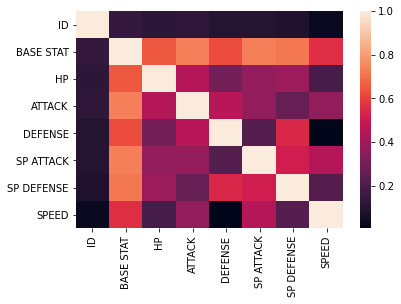

In [15]:
#Heatmap 
import seaborn as sns
sns.heatmap(correlation)

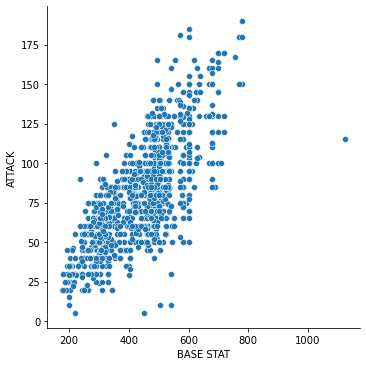

In [16]:
sns.relplot(x = 'BASE STAT', y = 'ATTACK', data = df )

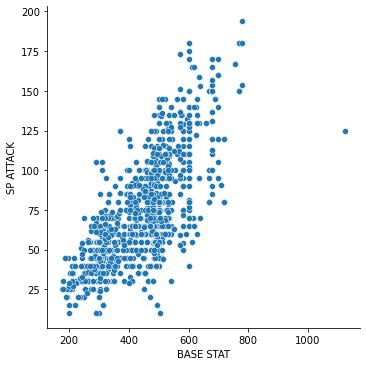

In [17]:
sns.relplot(x = 'BASE STAT', y = 'SP ATTACK', data = df )

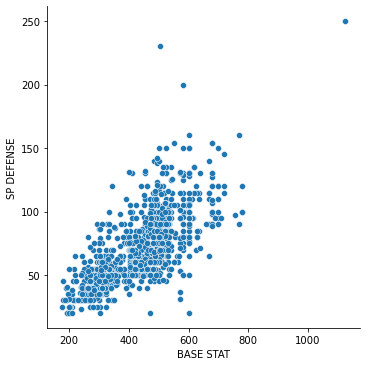

In [18]:
sns.relplot(x = 'BASE STAT', y = 'SP DEFENSE', data = df )

/home/chloe/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BASE STAT', ylabel='Density'>

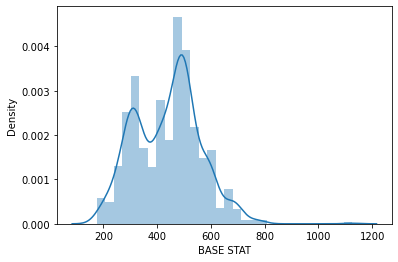

In [27]:
sns.distplot(df['BASE STAT'], bins = 30)

/home/chloe/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ATTACK', ylabel='Density'>

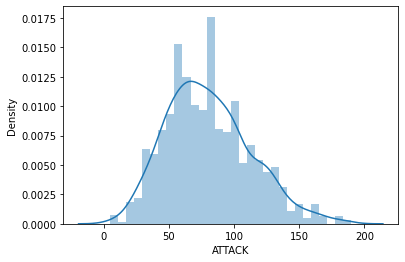

In [29]:
sns.distplot(df['ATTACK'], bins = 30)

/home/chloe/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

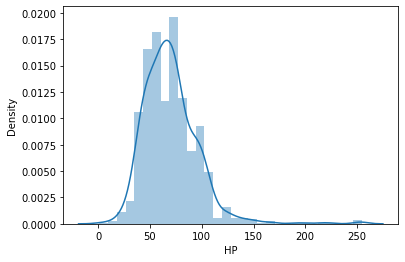

In [30]:
sns.distplot(df['HP'], bins = 30)

/home/chloe/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SPEED', ylabel='Density'>

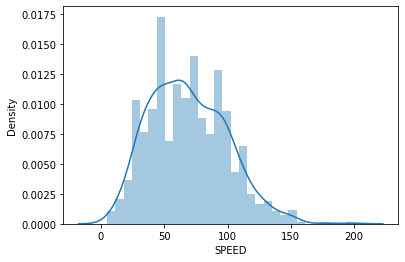

In [31]:
sns.distplot(df['SPEED'], bins = 30)

In [65]:
def min(df, col_list):
    txt = ''
    for col in col_list:
        val = df[col].min()
        name = df[df[col] == val]['NAME'].values[0]
        txt += "{0}{1} has the lowest {2} of {3}.{4}".format("\n",name, col, str(val),"\n")
       
    return txt
    

In [66]:
print(min(df, col_list))


Wishiwashi Solo Form has the lowest BASE STAT of 175.0.

Shedinja has the lowest HP of 1.0.

Chansey has the lowest ATTACK of 5.0.

Chansey has the lowest DEFENSE of 5.0.

Sandshrew Alolan Sandshrew has the lowest SP ATTACK of 10.0.

Caterpie has the lowest SP DEFENSE of 20.0.

Shuckle has the lowest SPEED of 5.0.



In [67]:
def max(df, col_list):
    txt = ''
    for col in col_list:
        val = df[col].max()
        name = df[df[col] == val]['NAME'].values[0]
        txt += "{0}{1} has the highest {2} of {3}.{4}".format("\n",name, col, str(val),"\n")
       
    return txt

In [68]:
print(max(df, col_list))


Eternatus Eternamax has the highest BASE STAT of 1125.0.

Blissey has the highest HP of 255.0.

Mewtwo Mega Mewtwo X has the highest ATTACK of 190.0.

Eternatus Eternamax has the highest DEFENSE of 250.0.

Mewtwo Mega Mewtwo Y has the highest SP ATTACK of 194.0.

Eternatus Eternamax has the highest SP DEFENSE of 250.0.

Regieleki has the highest SPEED of 200.0.



In [77]:
plt.style.use('ggplot')

array([[<AxesSubplot:xlabel='BASE STAT', ylabel='BASE STAT'>,
        <AxesSubplot:xlabel='HP', ylabel='BASE STAT'>,
        <AxesSubplot:xlabel='ATTACK', ylabel='BASE STAT'>,
        <AxesSubplot:xlabel='DEFENSE', ylabel='BASE STAT'>,
        <AxesSubplot:xlabel='SP ATTACK', ylabel='BASE STAT'>,
        <AxesSubplot:xlabel='SP DEFENSE', ylabel='BASE STAT'>,
        <AxesSubplot:xlabel='SPEED', ylabel='BASE STAT'>],
       [<AxesSubplot:xlabel='BASE STAT', ylabel='HP'>,
        <AxesSubplot:xlabel='HP', ylabel='HP'>,
        <AxesSubplot:xlabel='ATTACK', ylabel='HP'>,
        <AxesSubplot:xlabel='DEFENSE', ylabel='HP'>,
        <AxesSubplot:xlabel='SP ATTACK', ylabel='HP'>,
        <AxesSubplot:xlabel='SP DEFENSE', ylabel='HP'>,
        <AxesSubplot:xlabel='SPEED', ylabel='HP'>],
       [<AxesSubplot:xlabel='BASE STAT', ylabel='ATTACK'>,
        <AxesSubplot:xlabel='HP', ylabel='ATTACK'>,
        <AxesSubplot:xlabel='ATTACK', ylabel='ATTACK'>,
        <AxesSubplot:xlabel='DEFENSE', yla

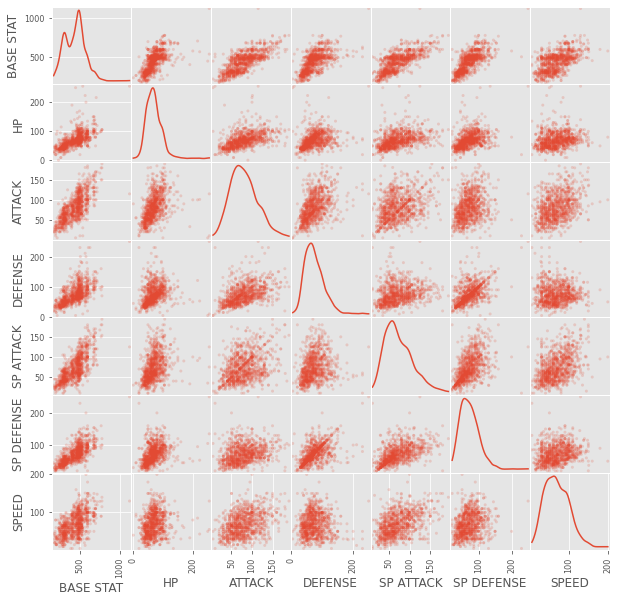

In [78]:
pd.plotting.scatter_matrix(df[col_list], alpha=0.2, figsize=(10, 10), diagonal='kde')

# More cleaning 

* Mega evolution is introduced later in the game (Gen VI). The pokemon in mega form shares the same ID as the original. Therefore, they will be removed from the dataset. 

In [79]:
mega = df[df['NAME'].str.contains('Mega ')]

In [80]:
idx = mega.index
idx

Int64Index([  3,   7,   8,  12,  19,  23,  84, 106, 125, 150, 164, 168, 182,
            194, 195, 227, 256, 261, 264, 281, 301, 308, 312, 316, 341, 362,
            364, 368, 371, 374, 384, 389, 401, 425, 431, 435, 447, 451, 456,
            458, 464, 514, 532, 536, 549, 565, 629, 843],
           dtype='int64')

In [81]:
df.index.isin(idx)

array([False, False, False, ..., False, False, False])

In [82]:
main_df = df[~df.index.isin(idx)]

In [83]:
main_df
# double check : 1044 - 48 = 993

ID                  NAME           TYPE  BASE STAT     HP  ATTACK  \
0       1             Bulbasaur   Grass Poison      318.0   45.0    49.0   
1       2               Ivysaur   Grass Poison      405.0   60.0    62.0   
2       3              Venusaur   Grass Poison      525.0   80.0    82.0   
4       4            Charmander          Fire       309.0   39.0    52.0   
5       5            Charmeleon          Fire       405.0   58.0    64.0   
...   ...                   ...            ...        ...    ...     ...   
1040  896             Glastrier           Ice       580.0  100.0   145.0   
1041  897             Spectrier         Ghost       580.0  100.0    65.0   
1042  898               Calyrex  Psychic Grass      500.0  100.0    80.0   
1043  898     Calyrex Ice Rider    Psychic Ice      680.0  100.0   165.0   
1044  898  Calyrex Shadow Rider  Psychic Ghost      680.0  100.0    85.0   

      DEFENSE  SP ATTACK  SP DEFENSE  SPEED  
0        49.0       65.0        65.0   45.0  
1        63.0       80.0        80.0   60.0  
2        83.0      100.0       100.0   80.0  
4        43.0       60.0        50.0   65.0  
5        58.0       80.0        65.0   80.0  
...       ...        ...         ...    ...  
1040    130.0       65.0       110.0   30.0  
1041     60.0      145.0        80.0  130.0  
1042     80.0       80.0        80.0   80.0  
1043    150.0       85.0       130.0   50.0  
1044     80.0      165.0       100.0  150.0  

[993 rows x 10 columns]

# Splitting 

In [84]:
main_df = main_df.reset_index()

In [85]:
main_df = main_df.drop("index", axis =1)
main_df

ID                  NAME           TYPE  BASE STAT     HP  ATTACK  \
0      1             Bulbasaur   Grass Poison      318.0   45.0    49.0   
1      2               Ivysaur   Grass Poison      405.0   60.0    62.0   
2      3              Venusaur   Grass Poison      525.0   80.0    82.0   
3      4            Charmander          Fire       309.0   39.0    52.0   
4      5            Charmeleon          Fire       405.0   58.0    64.0   
..   ...                   ...            ...        ...    ...     ...   
988  896             Glastrier           Ice       580.0  100.0   145.0   
989  897             Spectrier         Ghost       580.0  100.0    65.0   
990  898               Calyrex  Psychic Grass      500.0  100.0    80.0   
991  898     Calyrex Ice Rider    Psychic Ice      680.0  100.0   165.0   
992  898  Calyrex Shadow Rider  Psychic Ghost      680.0  100.0    85.0   

     DEFENSE  SP ATTACK  SP DEFENSE  SPEED  
0       49.0       65.0        65.0   45.0  
1       63.0       80.0        80.0   60.0  
2       83.0      100.0       100.0   80.0  
3       43.0       60.0        50.0   65.0  
4       58.0       80.0        65.0   80.0  
..       ...        ...         ...    ...  
988    130.0       65.0       110.0   30.0  
989     60.0      145.0        80.0  130.0  
990     80.0       80.0        80.0   80.0  
991    150.0       85.0       130.0   50.0  
992     80.0      165.0       100.0  150.0  

[993 rows x 10 columns]

In [86]:
# Look for the index of the last pokemon in Gen IV, which is Arceus 
main_df[main_df['NAME'] == 'Arceus'].index.values

array([540])

In [87]:
main_df.loc[540]

ID                493
NAME           Arceus
TYPE          Normal 
BASE STAT         720
HP                120
ATTACK            120
DEFENSE           120
SP ATTACK         120
SP DEFENSE        120
SPEED             120
Name: 540, dtype: object

In [88]:
# Spliting into 2 samples 
df1 = main_df[: 541]
df1

ID                NAME          TYPE  BASE STAT     HP  ATTACK  DEFENSE  \
0      1           Bulbasaur  Grass Poison      318.0   45.0    49.0     49.0   
1      2             Ivysaur  Grass Poison      405.0   60.0    62.0     63.0   
2      3            Venusaur  Grass Poison      525.0   80.0    82.0     83.0   
3      4          Charmander         Fire       309.0   39.0    52.0     43.0   
4      5          Charmeleon         Fire       405.0   58.0    64.0     58.0   
..   ...                 ...           ...        ...    ...     ...      ...   
536  490             Manaphy        Water       600.0  100.0   100.0    100.0   
537  491             Darkrai         Dark       600.0   70.0    90.0     90.0   
538  492  Shaymin Land Forme        Grass       600.0  100.0   100.0    100.0   
539  492   Shaymin Sky Forme  Grass Flying      600.0  100.0   103.0     75.0   
540  493              Arceus       Normal       720.0  120.0   120.0    120.0   

     SP ATTACK  SP DEFENSE  SPEED  
0         65.0        65.0   45.0  
1         80.0        80.0   60.0  
2        100.0       100.0   80.0  
3         60.0        50.0   65.0  
4         80.0        65.0   80.0  
..         ...         ...    ...  
536      100.0       100.0  100.0  
537      135.0        90.0  125.0  
538      100.0       100.0  100.0  
539      120.0        75.0  127.0  
540      120.0       120.0  120.0  

[541 rows x 10 columns]

In [89]:
df2 = main_df[541:]
df2

ID                  NAME           TYPE  BASE STAT     HP  ATTACK  \
541  494               Victini   Psychic Fire      600.0  100.0   100.0   
542  495                 Snivy         Grass       308.0   45.0    45.0   
543  496               Servine         Grass       413.0   60.0    60.0   
544  497             Serperior         Grass       528.0   75.0    75.0   
545  498                 Tepig          Fire       308.0   65.0    63.0   
..   ...                   ...            ...        ...    ...     ...   
988  896             Glastrier           Ice       580.0  100.0   145.0   
989  897             Spectrier         Ghost       580.0  100.0    65.0   
990  898               Calyrex  Psychic Grass      500.0  100.0    80.0   
991  898     Calyrex Ice Rider    Psychic Ice      680.0  100.0   165.0   
992  898  Calyrex Shadow Rider  Psychic Ghost      680.0  100.0    85.0   

     DEFENSE  SP ATTACK  SP DEFENSE  SPEED  
541    100.0      100.0       100.0  100.0  
542     55.0       45.0        55.0   63.0  
543     75.0       60.0        75.0   83.0  
544     95.0       75.0        95.0  113.0  
545     45.0       45.0        45.0   45.0  
..       ...        ...         ...    ...  
988    130.0       65.0       110.0   30.0  
989     60.0      145.0        80.0  130.0  
990     80.0       80.0        80.0   80.0  
991    150.0       85.0       130.0   50.0  
992     80.0      165.0       100.0  150.0  

[452 rows x 10 columns]

* Move all  the Galarian pokemon from df1 to df2 

In [91]:
galarian = df1[df1['NAME'].str.contains('Galarian ')]
len(galarian)

11

In [92]:
galarian_idx = galarian.index
galarian_idx

Int64Index([63, 93, 95, 97, 99, 103, 135, 148, 250, 292, 294], dtype='int64')

In [93]:
df1_ = df1[~df1.index.isin(galarian_idx)]

In [94]:
df1_

ID                NAME          TYPE  BASE STAT     HP  ATTACK  DEFENSE  \
0      1           Bulbasaur  Grass Poison      318.0   45.0    49.0     49.0   
1      2             Ivysaur  Grass Poison      405.0   60.0    62.0     63.0   
2      3            Venusaur  Grass Poison      525.0   80.0    82.0     83.0   
3      4          Charmander         Fire       309.0   39.0    52.0     43.0   
4      5          Charmeleon         Fire       405.0   58.0    64.0     58.0   
..   ...                 ...           ...        ...    ...     ...      ...   
536  490             Manaphy        Water       600.0  100.0   100.0    100.0   
537  491             Darkrai         Dark       600.0   70.0    90.0     90.0   
538  492  Shaymin Land Forme        Grass       600.0  100.0   100.0    100.0   
539  492   Shaymin Sky Forme  Grass Flying      600.0  100.0   103.0     75.0   
540  493              Arceus       Normal       720.0  120.0   120.0    120.0   

     SP ATTACK  SP DEFENSE  SPEED  
0         65.0        65.0   45.0  
1         80.0        80.0   60.0  
2        100.0       100.0   80.0  
3         60.0        50.0   65.0  
4         80.0        65.0   80.0  
..         ...         ...    ...  
536      100.0       100.0  100.0  
537      135.0        90.0  125.0  
538      100.0       100.0  100.0  
539      120.0        75.0  127.0  
540      120.0       120.0  120.0  

[530 rows x 10 columns]

In [95]:
df2_ = pd.concat([df2,galarian])
df2_

ID                          NAME          TYPE  BASE STAT     HP  \
541  494                       Victini  Psychic Fire      600.0  100.0   
542  495                         Snivy        Grass       308.0   45.0   
543  496                       Servine        Grass       413.0   60.0   
544  497                     Serperior        Grass       528.0   75.0   
545  498                         Tepig         Fire       308.0   65.0   
..   ...                           ...           ...        ...    ...   
135  110      Weezing Galarian Weezing  Poison Fairy      490.0   65.0   
148  122    Mr. Mime Galarian Mr. Mime   Psychic Ice      460.0   50.0   
250  222      Corsola Galarian Corsola        Ghost       410.0   60.0   
292  263  Zigzagoon Galarian Zigzagoon   Dark Normal      240.0   38.0   
294  264      Linoone Galarian Linoone   Dark Normal      420.0   78.0   

     ATTACK  DEFENSE  SP ATTACK  SP DEFENSE  SPEED  
541   100.0    100.0      100.0       100.0  100.0  
542    45.0     55.0       45.0        55.0   63.0  
543    60.0     75.0       60.0        75.0   83.0  
544    75.0     95.0       75.0        95.0  113.0  
545    63.0     45.0       45.0        45.0   45.0  
..      ...      ...        ...         ...    ...  
135    90.0    120.0       85.0        70.0   60.0  
148    65.0     65.0       90.0        90.0  100.0  
250    55.0    100.0       65.0       100.0   30.0  
292    30.0     41.0       30.0        41.0   60.0  
294    70.0     61.0       50.0        61.0  100.0  

[463 rows x 10 columns]

<AxesSubplot:>

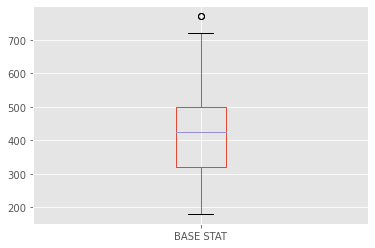

In [96]:
df1_.boxplot(column = 'BASE STAT')


<AxesSubplot:>

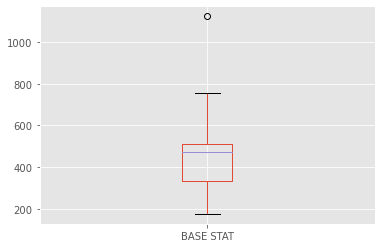

In [97]:
df2_.boxplot(column = 'BASE STAT')

In [117]:
old_stat = list(df1_['BASE STAT'])
new_stat = list(df2_['BASE STAT'])

In [100]:
# Detect outliers 
import numpy as np
import pandas as pd
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [103]:
outlier_1 = detect_outlier(old_stat)
outlier_1 #Kyogre and Primal Groudon 

[770.0, 770.0]

In [104]:
outlier_2 = detect_outlier(new_stat)
outlier_2

[1125.0]

In [118]:
# Remove the outlier from new_stat 
#old_stat.remove(770.0)
#old_stat.remove(770.0)
new_stat.remove(1125.0)

In [119]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)


In [120]:
# T value
test_statistic = welch_test_statistic(old_stat, new_stat)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -3.27


In [121]:
# Degree of freedom 
def welch_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df


In [122]:
dof = welch_df(old_stat, new_stat)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(dof))

Degrees of Freedom for Welch's Test: 964.89


In [123]:
len(new_stat)

462

In [124]:
len(old_stat)

530

In [126]:
df2_.to_csv("new_gen_upd.csv", header = True)

In [127]:
df1_.to_csv("old_gen_upd.csv", header = True)

In [128]:
from scipy import stats
# T-distribution
students = stats.t(dof)
pvalue = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average total stats: {:2.9f}".format(pvalue))

p-value for different average total stats: 0.001125976


**Reject null hypothesis**